In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel('/content/Final Lead Data.xlsx')

In [ ]:
data.head(5)

,ID,First Name,Email,Gender,City,Created,Position,New College Name,Colleges,Academic Year,Branch/ Specialisation,Other Branch,What is your current academic year?,Company Name/ College Name,Would you like to know more about us and our programs?,Are you interested in knowing more about our events?,Have you recommended Cloud Counselage to anyone?,How did you come to know about this event?
0,68112,ANIKET,aniket@xyz.com,NaN,NaN,04/27/2022 01:41:38 pm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,no,NaN
1,68110,Dhanshree,dhanshree@xyz.com,NaN,NaN,04/22/2022 04:08:38 pm,NaN,Lords Universal College,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,no,NaN
2,68108,Dhiraj,dhiraj@xyz.com,NaN,NaN,04/16/2022 10:31:59 pm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,no,NaN
3,68106,Pooja,pooja@xyz.com,NaN,NaN,04/13/2022 10:05:15 pm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,no,NaN
4,68090,Aayush,aayush@xyz.com,NaN,NaN,03/26/2022 07:02:48 pm,NaN,B.k Birla college,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,no,NaN


In [ ]:
data.columns

Index(['ID', 'First Name', 'Email', 'Gender', 'City', 'Created', 'Position',
       'New College Name', 'Colleges', 'Academic Year',
       'Branch/ Specialisation', 'Other Branch',
       'What is your current academic year?', 'Company Name/ College Name',
       'Would you like to know more about us and our programs?',
       'Are you interested in knowing more about our events?',
       'Have you recommended Cloud Counselage to anyone?',
       'How did you come to know about this event?'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   ID                                                      5303 non-null   int64  
 1   First Name                                              5303 non-null   object 
 2   Email                                                   5303 non-null   object 
 3   Gender                                                  200 non-null    object 
 4   City                                                    55 non-null     object 
 5   Created                                                 5303 non-null   object 
 6   Position                                                6 non-null      object 
 7   New College Name                                        1818 non-null   object 
 8   Colleges                              

In [ ]:
# Checking for Null values
data.isna().sum()

ID                                                           0
First Name                                                   0
Email                                                        0
Gender                                                    5103
City                                                      5248
Created                                                      0
Position                                                  5297
New College Name                                          3485
Colleges                                                  3622
Academic Year                                             2785
Branch/ Specialisation                                    2783
Other Branch                                              4659
What is your current academic year?                       5172
Company Name/ College Name                                5065
Would you like to know more about us and our programs?       0
Are you interested in knowing more about our events?   

In [ ]:
# Checking for duplicate values
data[data.duplicated]

,ID,First Name,Email,Gender,City,Created,Position,New College Name,Colleges,Academic Year,Branch/ Specialisation,Other Branch,What is your current academic year?,Company Name/ College Name,Would you like to know more about us and our programs?,Are you interested in knowing more about our events?,Have you recommended Cloud Counselage to anyone?,How did you come to know about this event?


In [ ]:
data.shape

(5303, 18)

In [ ]:
# We pick two approaches here to find the graduation year,
# 1. When academic year value is specified
# 2. When academic year value is unspecified

In [ ]:
# Approach 1: When Academic value is known

# We have values specified in both 'Academic Year' & 'What is your current academic year?' columns

# Merging data from Columns 'Academic Year' and 'What is your current academic year?' into single column

data['Academic Year'] = data['Academic Year'].fillna(data['What is your current academic year?'])

In [ ]:
columns_to_drop=["Position","Gender","City","Colleges","New College Name","Branch/ Specialisation","Company Name/ College Name","What is your current academic year?","Would you like to know more about us and our programs?","Are you interested in knowing more about our events?","Have you recommended Cloud Counselage to anyone?","How did you come to know about this event?","Email","Other Branch"]
data.drop (columns_to_drop, axis=1, inplace=True)

In [ ]:
data.head(2)

,ID,First Name,Created,Academic Year
0,68112,ANIKET,04/27/2022 01:41:38 pm,NaN
1,68110,Dhanshree,04/22/2022 04:08:38 pm,NaN


In [ ]:
data.isna().sum()

ID                  0
First Name          0
Created             0
Academic Year    2765
dtype: int64

In [ ]:
# Now, we Convert the 'Created' column to datetime format
data['Created'] = pd.to_datetime(data['Created'])

In [ ]:
# Extracting only the year from the 'Created' column into a separate column called 'Created Year'
data['Created Year'] = data['Created'].dt.year

In [ ]:
# Coverting 'Academic year to type:int'
data['Academic Year'] = pd.to_numeric(data['Academic Year'], errors='coerce').astype('Int64')

In [ ]:
# Implementing Approach 1
# Calculating the Graduation Year when the Academic year is known
data['Graduation Year'] = data['Created Year'] + data['Academic Year']

In [ ]:
data

,ID,First Name,Created,Academic Year,Created Year,Graduation Year
0,68112,ANIKET,2022-04-27 13:41:38,<NA>,2022,<NA>
1,68110,Dhanshree,2022-04-22 16:08:38,<NA>,2022,<NA>
2,68108,Dhiraj,2022-04-16 22:31:59,<NA>,2022,<NA>
3,68106,Pooja,2022-04-13 22:05:15,<NA>,2022,<NA>
4,68090,Aayush,2022-03-26 19:02:48,<NA>,2022,<NA>
...,...,...,...,...,...,...
5298,25834,Pratik,2019-10-16 10:19:42,<NA>,2019,<NA>
5299,25832,Nikita,2019-10-16 10:19:41,<NA>,2019,<NA>
5300,25830,Ashwini,2019-10-16 10:19:10,<NA>,2019,<NA>
5301,25828,Jheanna Mae,2019-10-16 10:19:08,3,2019,2022


In [ ]:
# Approach 2: To predict the graduation year when Academic Year is unknown

In [ ]:
# Since, the duration of most of the engineering degrees are 4 years, We assume that Avg.Duration is 4
# Creating a new column avg duration

data['Avg.Duration'] = 4

In [ ]:
data.loc[data['Academic Year'].isna(), 'Graduation Year'] = data['Created Year'] + data['Avg.Duration']

In [ ]:
data

,ID,First Name,Created,Academic Year,Created Year,Graduation Year,Avg.Duration
0,68112,ANIKET,2022-04-27 13:41:38,<NA>,2022,2026,4
1,68110,Dhanshree,2022-04-22 16:08:38,<NA>,2022,2026,4
2,68108,Dhiraj,2022-04-16 22:31:59,<NA>,2022,2026,4
3,68106,Pooja,2022-04-13 22:05:15,<NA>,2022,2026,4
4,68090,Aayush,2022-03-26 19:02:48,<NA>,2022,2026,4
...,...,...,...,...,...,...,...
5298,25834,Pratik,2019-10-16 10:19:42,<NA>,2019,2023,4
5299,25832,Nikita,2019-10-16 10:19:41,<NA>,2019,2023,4
5300,25830,Ashwini,2019-10-16 10:19:10,<NA>,2019,2023,4
5301,25828,Jheanna Mae,2019-10-16 10:19:08,3,2019,2022,4


In [ ]:
data.describe()

,ID,Academic Year,Created Year,Graduation Year,Avg.Duration
count,5303.000000,2518.0,5303.000000,5303.0,5303.0
mean,43667.782199,2.781176,2020.265887,2023.687158,4.0
std,14540.435620,0.817087,0.614962,1.018315,0.0
min,25826.000000,1.0,2019.000000,2021.0,4.0
25%,32703.000000,2.0,2020.000000,2023.0,4.0
50%,37127.000000,3.0,2020.000000,2024.0,4.0
75%,63959.000000,3.0,2021.000000,2024.0,4.0
max,68112.000000,4.0,2022.000000,2026.0,4.0


In [ ]:
#Downloading the graduation year output file
file_path = "/content/graduation_year_output_file.xlsx"

data.to_excel(file_path, index=False)

<ipython-input-24-b28d95e1b73f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=sns.heatmap(data.corr(), annot = True, linewidths=.1, cmap="Blues")


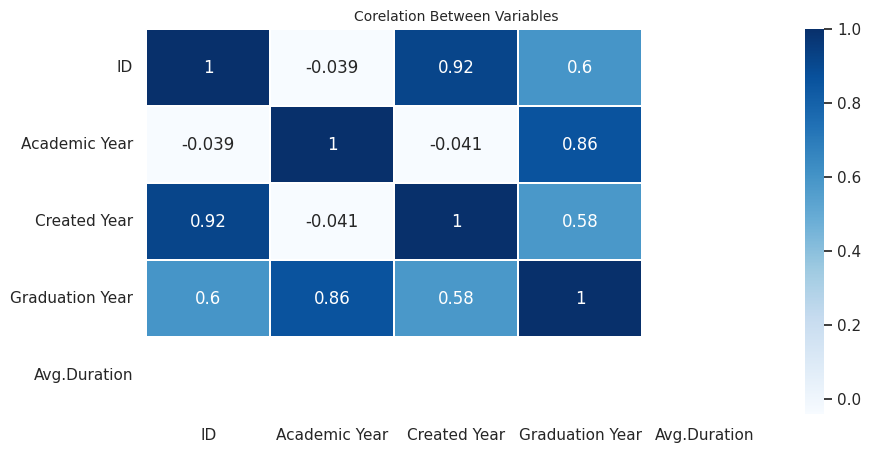

In [ ]:
# Heat map for Correlation of variables

sns.set(style="white")
plt.rcParams['figure.figsize'] = (10, 5)
corrmat=sns.heatmap(data.corr(), annot = True, linewidths=.1, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 10)
plt.show()